- I modified the tutorial code to get the mapping (genre) of the predicted index
- Interpretation done by my own accord

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 128, 11, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 64, 6, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 64, 6, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 62, 4, 32)           │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 31, 2, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 31, 2, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 30, 1, 32)           │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 15, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 15, 1, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │          30,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,514 (177.79 KB)

 Trainable params: 45,322 (177.04 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.1746 - loss: 2.6919 - val_accuracy: 0.3593 - val_loss: 1.8915
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.3265 - loss: 1.9856 - val_accuracy: 0.4320 - val_loss: 1.6084
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4103 - loss: 1.7003 - val_accuracy: 0.4760 - val_loss: 1.4422
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.4630 - loss: 1.5462 - val_accuracy: 0.5120 - val_loss: 1.3458
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4835 - loss: 1.4278 - val_accuracy: 0.5413 - val_loss: 1.2677
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5173 - loss: 1.3641 - val_accuracy: 0.5560 - val_loss: 1.2161
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5134 - loss: 1.3265 - val_accuracy: 0.5813 - val_loss: 1.1585
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5544 - loss: 1.2325 - val_acc

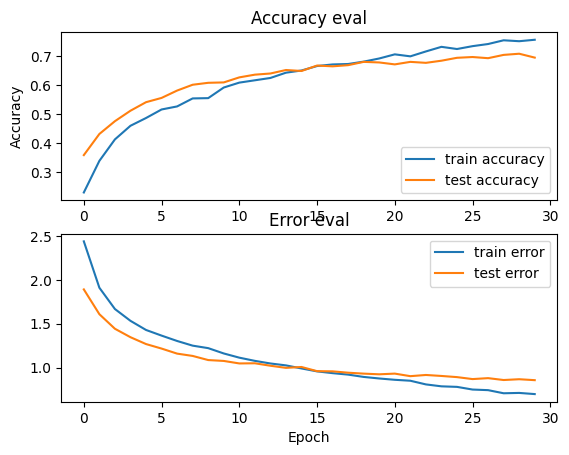

In [23]:
import json
import numpy as np 
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "data.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp: 
        data = json.load(fp)

    # convert lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    return inputs, targets

def load_genres(dataset_path=DATASET_PATH):
    with open(dataset_path, "r") as fp: 
        data = json.load(fp)

    genres = np.array(data["mapping"])
    return genres

def prepare_datasets(test_size, validation_size):

    # load data
    inputs, targets = load_data(DATASET_PATH)
    
    # create train/test split 
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=test_size)

    # create the train/validation split
    inputs_train, inputs_validation, targets_train, targets_validation = train_test_split(inputs_train, targets_train, test_size=validation_size)

    # for a CNN, tensorflow expects a 3d array for each sample, currently inputs_train samples are 2d arrays 
    # 3d array -> (130, 13(mfcc), 1(depth))
    inputs_train = inputs_train[..., np.newaxis] # 4d array -> (num_samples, 130, 13, 1)
    inputs_validation = inputs_validation[..., np.newaxis]
    inputs_test = inputs_test[..., np.newaxis]

    return inputs_train, inputs_validation, inputs_test, targets_train, targets_validation, targets_test


def build_model(input_shape):

    """Generates CNN model
    param:
        input_shape (tuple): shape of input set 
    return: model (CNN model)"""

    # create model 
    model = keras.Sequential()
    
    # 1st conv layer  
    model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer 
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((2, 2), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten the output at feed it into dense layer 
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3)) # to prevent overfitting

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model
    
def predict(model, inputs, targets):

    with open(DATASET_PATH, "r") as fp: 
        data = json.load(fp)

    genres = np.array(data["mapping"])
    
    # inputs -> 3d array: (130, 13, 1)
    inputs = inputs[np.newaxis, ...] # model expects 4d array, 4th dimention is no. of samples -> (1, 130, 13, 1)

    # prediction = [[0.1, 0.2, ....]] -> 10 values, indicating different probabilities for different genres
    prediction = model.predict(inputs) 

    # get the index with max value
    predicted_index = np.argmax(prediction, axis=1) 

    #predicted_genre = genres[predicted_index]

    #expected_genre = data.get("Mapping", targets)
    print("Expected index: {}, Predicted index:{}".format(targets, predicted_index))
    print("Expected genre: {}, Predicted genre:{}".format(genres[targets], genres[predicted_index]))


def plot_history(history):
    fig, axs = plt.subplots(2) 

    # create accuracy subplot 
    axs[0].plot(history.history["accuracy"], label="train accuracy") # the accuracy of the train set is stored in a dict called history and the key is history
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error") # the accuracy of the train set is stored in a dict called history and the key is history
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

if __name__ == "__main__":
    # create train, validation, and test sets
    inputs_train, inputs_validation, inputs_test, targets_train, targets_validation, targets_test = prepare_datasets(0.25, 0.2)

    # build the CNN 
    input_shape = (inputs_train.shape[1], inputs_train.shape[2], inputs_train.shape[3])
    model = build_model(input_shape)


    # compile the network
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])


    # train the CNN 
    model.summary()
    
    history = model.fit(inputs_train, targets_train,
                  validation_data=(inputs_validation, targets_validation),
                  batch_size=32, epochs=30)


    # evaluate the CNN on the test set
    test_error, test_accuracy = model.evaluate(inputs_test, targets_test, verbose=1)
    print("Accuracy on test set is: {}".format(test_accuracy))

    # make predictions on a sample (inference)
    inputs = inputs_test[100]
    targets = targets_test[100]
    
    predict(model, inputs, targets)
    
    # plot accuracy/error for training and validation
    plot_history(history)
    
    

In [24]:
# model trained correctly!

Interpretation:
- between epochs 0-15, the model has a test accuracy higher than it's train accuracy
- the train and test accuracies are exactly the same at epoch 15, with the the test set having a loss (error) 0.0164 (1.64%) higher than the train set
- from epochs 16-30, the accuracy and error values or the train and test sets diverge slightly

**for more accurate values**
- I'd stop the training at epoch 15 
      - tested this out in another notebook, it doesn't work.
  results:
          Accuracy on test set is: 0.6558623313903809
          Expected index: 2, Predicted index:[7]
Expected genre: C:\Users\phoen\Documents\Code\AI_ML\genres\country, Predicted genre:['C:\\Users\\phoen\\Documents\\Code\\AI_ML\\genres\\pop']

the lines of the train error and test error on the graph do not intersect. This could mean they in fact intersect after 15

**I'll try 18 epochs**
Prediciton incorrect

**22 epochs**
Accuracy on test set is: 0.703881561756134
Expected index: 1, Predicted index:[1]
Expected genre: C:\Users\phoen\Documents\Code\AI_ML\genres\classical, Predicted genre:['C:\\Users\\phoen\\Documents\\Code\\AI_ML\\genres\\classical']

Conclusion: decreasing the number of epochs shifts the intersection point to a later epoch. 
The only version where test and train acuracies are the same is the version where the CNN has 30 epochs.
Therefore, this is the most accurate model I have been able to produce.